<a href="https://colab.research.google.com/github/DB11051998/Fifa_19/blob/master/covid19_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd drive/My Drive

/content/drive/My Drive


In [ ]:
%ls


 20200424_104911.jpg
 20200920.jpg
 20200927_084435.jpg
 5_6163284684009636351.zip
 Action-Recognition-master/
'assignment new.pdf'
 autoandco.pdf
'Call recording Kuanr_200918_202905.m4a'
'cancer dataset'/
'Chief Marketing Officer Resume.zip'
 cifar-10/
 Classroom/
'Colab Notebooks'/
 comma.ai/
'Copy of debasish_behera_CV-1.jpg'
'Covid-19 computer vision'/
'CovXNet Summary.gdoc'
 Dance.ipynb
 Dataset/
 Debasish_BCSI_TEST.docx
 debasish_behera_CV-1.jpg
 debasish_behera_CV.pdf
 Debasish_Behera_CV.pdf
'DEBASISH_BEHERA-EE-2021-RESUME (1).pdf'
 DEBASISH_BEHERA-EE-2021-RESUME.pdf
'debasish behera - Intro to Machine Learning.png'
 DebasishBehera_plan.gsheet
 debasishbehera_resume.pdf
 Debasish_Behera_Resume.pdf
'debasishbeheratata - Debasish Behera.pdf'
 debasishbeheratata.pdf
 debasish.pdf
 digits/
 doc_new_1.docx
 DS-Assignment/
 EmbeddedML@
 Eopsaltria_australis_-_Mogo_Campground.jpg
 face-recognition-using-dlib-master/
 Fingenesis/
'Getting started.pdf'
 global_wheat/
 Grammarly_files/
'H

In [ ]:
cd Covid-19\ computer\ vision

/content/drive/My Drive/Covid-19 computer vision


In [ ]:
%ls

covid19_detect.ipynb  covid-chestxray-dataset/


## Import Libraries

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/My Drive/Covid-19 computer vision/covid-chestxray-dataset/metadata.csv')

In [ ]:
data.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [ ]:
data[data['finding']=='Unknown']

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
419,221,-10.0,M,NaN,Unknown,Unclear,Y,NaN,NaN,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AP Supine,X-ray,2020,"Hannover Medical School, Hannover, Germany",images,a4318ac9.jpg,10.6084/m9.figshare.12275009,https://github.com/ml-workgroup/covid-19-image...,CC BY 3.0,NaN,NaN,NaN


In [ ]:
data['finding'].value_counts()

Pneumonia/Viral/COVID-19                   584
todo                                        83
Pneumonia                                   81
Pneumonia/Fungal/Pneumocystis               30
Pneumonia/Bacterial/Streptococcus           22
No Finding                                  22
Tuberculosis                                18
Pneumonia/Viral/SARS                        16
Pneumonia/Lipoid                            13
Pneumonia/Bacterial/Mycoplasma              11
Pneumonia/Viral/MERS-CoV                    10
Pneumonia/Bacterial/Legionella              10
Pneumonia/Bacterial/Klebsiella              10
Pneumonia/Bacterial/Nocardia                 8
Pneumonia/Viral/Varicella                    6
Pneumonia/Viral/Influenza                    5
Pneumonia/Bacterial/E.Coli                   4
Pneumonia/Bacterial                          4
Pneumonia/Bacterial/Chlamydophila            3
Pneumonia/Viral/Herpes                       3
Pneumonia/Viral/Influenza/H1N1               2
Pneumonia/Fun

defined the target column

In [ ]:
def covid_or_not(data):
  #if data not in ['todo','Unknown','No Finding']:
  if data!='Pneumonia/Viral/COVID-19':
    return 'Pneumonia'
  else:
    return 'covid'
data['covid_or_not']=data['finding'].apply(covid_or_not)

In [ ]:
data['covid_or_not'].value_counts()

covid        584
Pneumonia    366
Name: covid_or_not, dtype: int64

In [ ]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%ls

covid19_detect.ipynb  covid-chestxray-dataset/


In [ ]:
ROOT_DIR ='covid-chestxray-dataset/'

In [ ]:
data['folder'].value_counts()

images     929
volumes     21
Name: folder, dtype: int64

Path of the image

In [ ]:
def filename(data):
  path='./covid-chestxray-dataset/'+data['folder']+'/'+data['filename']
  return path
data['path']=data.apply(filename,axis=1)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               950 non-null    object 
 1   offset                  697 non-null    float64
 2   sex                     870 non-null    object 
 3   age                     713 non-null    float64
 4   finding                 950 non-null    object 
 5   RT_PCR_positive         593 non-null    object 
 6   survival                361 non-null    object 
 7   intubated               248 non-null    object 
 8   intubation_present      250 non-null    object 
 9   went_icu                397 non-null    object 
 10  in_icu                  335 non-null    object 
 11  needed_supplemental_O2  90 non-null     object 
 12  extubated               37 non-null     object 
 13  temperature             78 non-null     float64
 14  pO2_saturation          119 non-null    fl

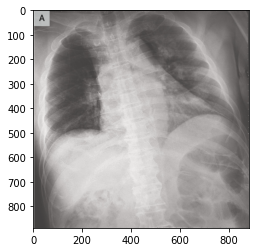

In [ ]:
##visualize the scanned image
plt.imshow(cv2.imread(data['path'][0]))

In [ ]:
def shape(data):
  if data['folder']=='images':
    img=cv2.imread(data['path'])
    #print(data)
    return img.shape



In [ ]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf

In [ ]:
IMG_W = 500
IMG_H = 500
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 48
BATCH_SIZE = 6

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               950 non-null    object 
 1   offset                  697 non-null    float64
 2   sex                     870 non-null    object 
 3   age                     713 non-null    float64
 4   finding                 950 non-null    object 
 5   RT_PCR_positive         593 non-null    object 
 6   survival                361 non-null    object 
 7   intubated               248 non-null    object 
 8   intubation_present      250 non-null    object 
 9   went_icu                397 non-null    object 
 10  in_icu                  335 non-null    object 
 11  needed_supplemental_O2  90 non-null     object 
 12  extubated               37 non-null     object 
 13  temperature             78 non-null     float64
 14  pO2_saturation          119 non-null    fl

In [ ]:
images_=data[data['folder']=='images'][data['modality']=='X-ray']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False,input_shape=(500,500,3))

In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 500, 500, 3) 0                                            
__________________________________________________________________________________________________
conv2d_193 (Conv2D)             (None, 249, 249, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 249, 249, 32) 96          conv2d_193[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 249, 249, 32) 0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

In [ ]:
base_model.layers

In [ ]:
for layer in base_model.layers:
	layer.trainable = False

In [ ]:
from keras.layers import GlobalAveragePooling2D,Dense
from keras.models import Model

In [ ]:
flat1 = GlobalAveragePooling2D()(base_model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(2, activation='softmax')(class1)
# define new model
model = Model(inputs=base_model.inputs, outputs=output)

In [ ]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 500, 500, 3) 0                                            
__________________________________________________________________________________________________
conv2d_193 (Conv2D)             (None, 249, 249, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 249, 249, 32) 96          conv2d_193[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 249, 249, 32) 0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

In [ ]:
model.compile(optimizer = 'rmsprop' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=images_,
    x_col='path',
    y_col='covid_or_not',
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_dataframe(
    dataframe=images_,
    x_col='path',
    y_col='covid_or_not', 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = 18)



Found 520 validated image filenames belonging to 2 classes.
Found 346 validated image filenames belonging to 2 classes.
Epoch 1/18
86/86 [==============================] - 77s 901ms/step - loss: 7.5822 - accuracy: 0.5623 - val_loss: 7.6933 - val_accuracy: 0.1959
Epoch 2/18
86/86 [==============================] - 78s 904ms/step - loss: 7.6627 - accuracy: 0.5661 - val_loss: 7.6953 - val_accuracy: 0.1959
Epoch 3/18
86/86 [==============================] - 78s 905ms/step - loss: 5.0302 - accuracy: 0.5311 - val_loss: 0.6971 - val_accuracy: 0.7982
Epoch 4/18
86/86 [==============================] - 78s 907ms/step - loss: 0.7051 - accuracy: 0.5097 - val_loss: 0.7018 - val_accuracy: 0.1959
Epoch 5/18
86/86 [==============================] - 78s 905ms/step - loss: 0.6950 - accuracy: 0.4689 - val_loss: 0.6932 - val_accuracy: 0.6637
Epoch 6/18
86/86 [==============================] - 78s 907ms/step - loss: 0.6932 - accuracy: 0.5019 - val_loss: 0.6931 - val_accuracy: 0.2076
Epoch 7/18
86/86 [====

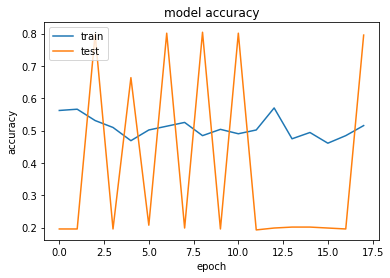

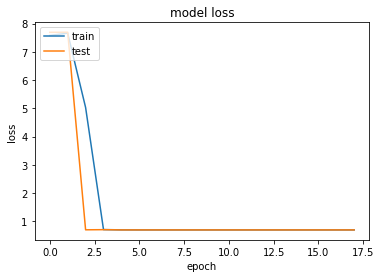

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
label = validation_generator.classes
pred= model.predict(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(label,predicted_class_indices))

              precision    recall  f1-score   support

           0       1.00      0.01      0.03        67
           1       0.81      1.00      0.89       279

    accuracy                           0.81       346
   macro avg       0.90      0.51      0.46       346
weighted avg       0.85      0.81      0.73       346



In [ ]:
cf = confusion_matrix(predicted_class_indices,label)
cf

array([[  1,   0],
       [ 66, 279]])

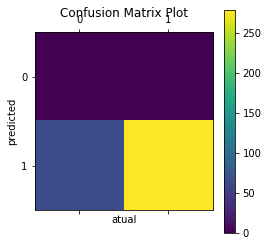

In [ ]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('atual')
plt.ylabel('predicted')
plt.show();